Majorana Qubit Simulation

 a single logical qubit in a Majorana system is encoded into 4 majorana modes where |0> and |1> correspond to even/odd fermion parity states of the Majoranas and the logical states are non locally encoded making them robust to local errors
 for N qubits, we need 2N+2 majoranas

We are going to build a Hadamard, Phase, and CNOT gate

First, we are going to showcase a simple implementation of qubit algebra as we learned in class

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#construct the Pauli matrices and identity
X = np.array([[0,1], [1,0]], dtype=complex)
Y = np.array([[0,-1j], [1j,0]], dtype=complex)
Z = np.array ([[1,0], [0,-1]], dtype=complex)
I = np.eye(2, dtype=complex)

def apply_gate(state,gate):
    return gate @ state #matrix multiplier

In [3]:
# Qubit starting at|0>
myqubit = np.array([1,0], dtype=complex) 

In [4]:
#phase gate - this is similar to the result of braiding two majorana fermions
S = np.array([[1,0],[0,1j]])

#hadamard gate
H = (1/np.sqrt(2)) * np.array([[1,1],[1,-1]])

In [5]:
#simple algebraic quantum simulator...
state = apply_gate(myqubit, H)
print("applying hadamard", state)

applying hadamard [0.70710678+0.j 0.70710678+0.j]


Majorana Algebra

In [14]:
# We take g_i and g_j as the gamma products... matrices acting on a 2d qubit space and we will represent majoranas using pauli matrices

# matrix multiplication can occasionally lead to some errors, so I did a simpler operation
gamma12 = 1j * Z # gamma1 * gamma2 = iZ
gamma23 = 1j * X # gamma2 * gamma3 = iX
gamma13 = -1j * Y # gamma1 * gamma3 = -iY

#braiding operator U12 similar to an S gate
def braiding_operator(gamma_product):
    theta = np.pi / 4
    return np.cos(theta) * I - np.sin(theta) * gamma_product
U_12 = braiding_operator(gamma12)
U_23 = braiding_operator(gamma23)
U_13 = braiding_operator(gamma13)

state_after_U12 = apply_gate(myqubit,U_12)
print("braided state of U_12 |0>", state_after_U12)

#Construct a braided hadamard
U_H = U_23 @ U_12 @ U_23
braided_hadamard = apply_gate(myqubit, U_H)
print("braided state after hadamard", braided_hadamard)

reapply = apply_gate(braided_hadamard, U_H)
print("reapplying hadamard", reapply)
reapply = apply_gate(reapply, U_H)
print("reapplying hadamard", reapply)
reapply = apply_gate(reapply, U_H)
print("reapplying hadamard", reapply)

braided state of U_12 |0> [0.70710678-0.70710678j 0.        +0.j        ]
braided state after hadamard [0.-0.70710678j 0.-0.70710678j]
reapplying hadamard [-1.+0.j  0.+0.j]
reapplying hadamard [0.+0.70710678j 0.+0.70710678j]
reapplying hadamard [1.+0.j 0.+0.j]


In [7]:
from functools import reduce

#jordan wigner mapping
def gamma_map(index, total_qubits):
    # index 1 is gamma1, index 2 is gamma 2 and so on
    q = (index + 1) // 2  # qubit number - finds which qubit the majorana operator belongs to
    op = X if index % 2 == 1 else Y  # odd index = X, even index = Y
    prefix = [Z] * (q - 1)           # jordan wigner string - Z operator on every qubit before the current qubit to maintain fermionic anticommutation
    # q = 3 would be Z * Z
    paulis = prefix + [op] + [I] * (total_qubits - q) # take the prefix of Z's, then the even or odd X/Y, then the identity 
    return reduce(np.kron, paulis) #applies kronecker product to all of the matrices in the pauli operator list

def braiding_multiple(gamma_i, gamma_j):
    theta = np.pi / 4
    gamma_product = 1j * gamma_i @ gamma_j
    dim = gamma_i.shape[0] # need to get the matrix dimension
    return np.cos(theta) * np.eye(dim) - np.sin(theta) * gamma_product


In [8]:
#2qubit state
base1 = np.array([1, 0, 0, 0], dtype=complex)
base2 = np.array([0, 1, 0, 0], dtype=complex)
base3 = np.array([0, 0, 1, 0], dtype=complex)
base4 = np.array([0, 0, 0, 1], dtype=complex)

# Get Majoranas
gamma1 = gamma_map(1, 2)
gamma2 = gamma_map(2, 2)
gamma3 = 1j * np.kron(Z, X) # found an error gamma map cannot be used for cnot gates
gamma4 = 1j * np.kron(Z, Y)

print("gamma3", gamma3)
print("gamma4", gamma4)

U_34 = braiding_multiple(gamma3,gamma4)
print("U34", U_34)
H_2 = np.kron(I,H) #hadamard on qubit 2
CNOT = H_2 @ U_34 @ H_2
CNOT1 = apply_gate(base1,CNOT)
CNOT2 = apply_gate(base2,CNOT)
CNOT3 = apply_gate(base3,CNOT)
CNOT4 = apply_gate(base4,CNOT)

print("result of applying CNOT1 gate", CNOT1)
print("result of applying CNOT2 gate", CNOT2)
print("result of applying CNOT3 gate", CNOT3)
print("result of applying CNOT4 gate", CNOT4)

gamma3 [[ 0.+0.j  0.+1.j  0.+0.j  0.+0.j]
 [ 0.+1.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -0.+0.j -0.-1.j]
 [ 0.+0.j  0.+0.j -0.-1.j -0.+0.j]]
gamma4 [[ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [-1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -0.+0.j -1.+0.j]
 [ 0.+0.j  0.+0.j  1.-0.j -0.+0.j]]
U34 [[0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 1.41421356+0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 1.41421356+0.j]]
result of applying CNOT1 gate [ 0.70710678+0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]
result of applying CNOT2 gate [-0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
result of applying CNOT3 gate [ 0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j]
result of applying CNOT4 gate [ 0.        +0.j  0.        +0.j -0.70710678+0.j  0.70710678+0.j]


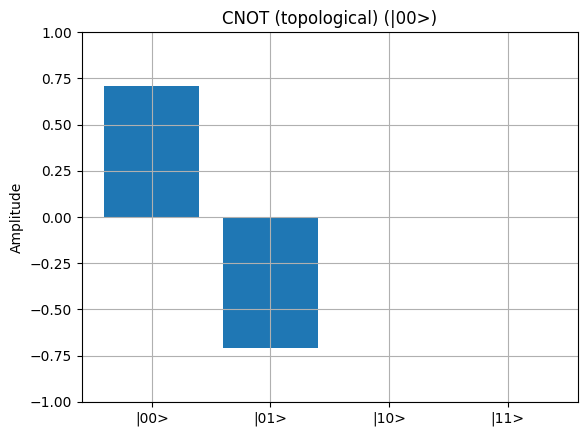

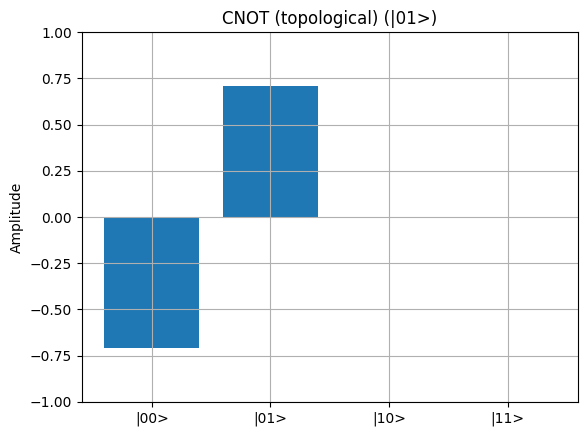

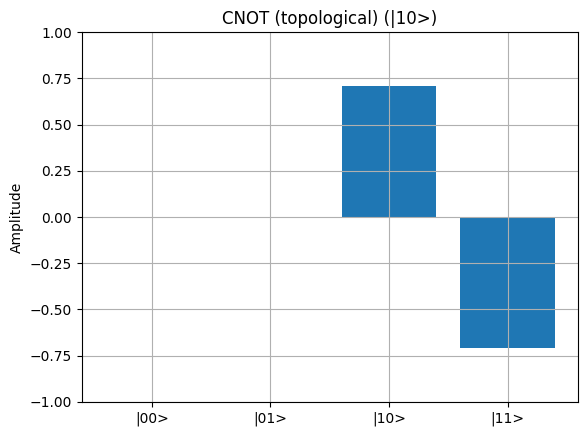

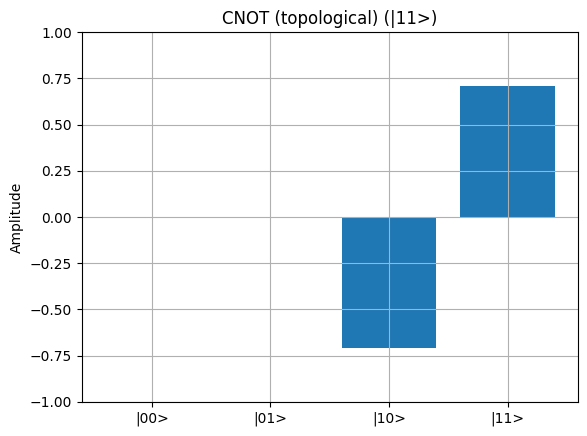

In [9]:
basis_labels = ['|00>', '|01>', '|10>', '|11>']

def plot_state_amplitudes(state, title):
    fig, ax = plt.subplots()
    real_parts = state.real
    ax.bar(basis_labels, real_parts)
    ax.set_ylim(-1, 1)
    ax.set_ylabel('Amplitude')
    ax.set_title(title)
    plt.grid(True)
    plt.show()
    
plot_state_amplitudes(CNOT1, 'CNOT (topological) (|00>)')
plot_state_amplitudes(CNOT2, 'CNOT (topological) (|01>)')
plot_state_amplitudes(CNOT3, 'CNOT (topological) (|10>)')
plot_state_amplitudes(CNOT4, 'CNOT (topological) (|11>)')

We see the demonstration of the limits of braiding only computation here which creates superposition